## Importing Required Libraries

In [197]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier,plot_tree

from sklearn.metrics import confusion_matrix,classification_report,cohen_kappa_score,roc_auc_score,roc_curve

from sklearn.model_selection import GridSearchCV

In [217]:
plt.rcParams["figure.figsize"] = (15,10)

## Reading the Data

In [199]:
df = pd.read_csv('Iris.csv',index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Understanding the Data

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [176]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Missing Values Check

In [177]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Exploratory Data Analysis

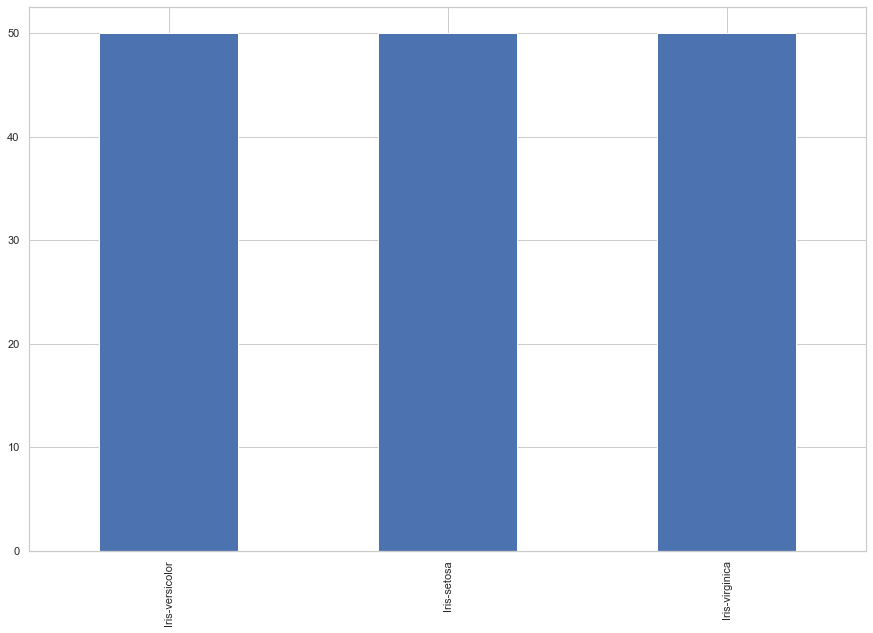

In [178]:
df.Species.value_counts().plot(kind='bar')
plt.show()

* The data is perfectly balanced so we dont require any balancing techniques like SMOTE or SMOTEENN.

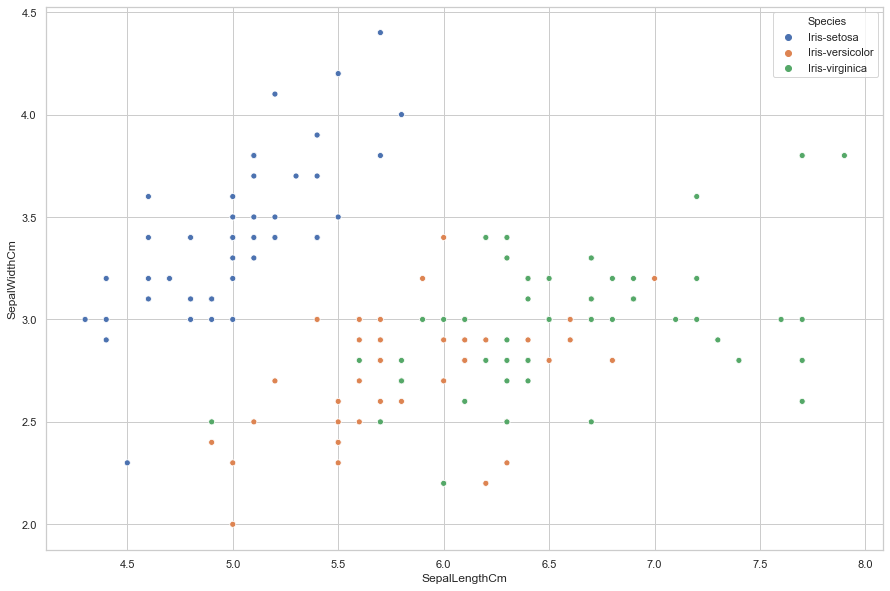

In [179]:
sns.scatterplot(df.SepalLengthCm,df.SepalWidthCm,hue=df.Species)
plt.show()

* Iris Sentosa has smaller sepal length and larger sepal width.
* Iris Virginia has large sepal length and small Sepal width.
* Iris Versicolor has smaller sepal length and Sepal width.

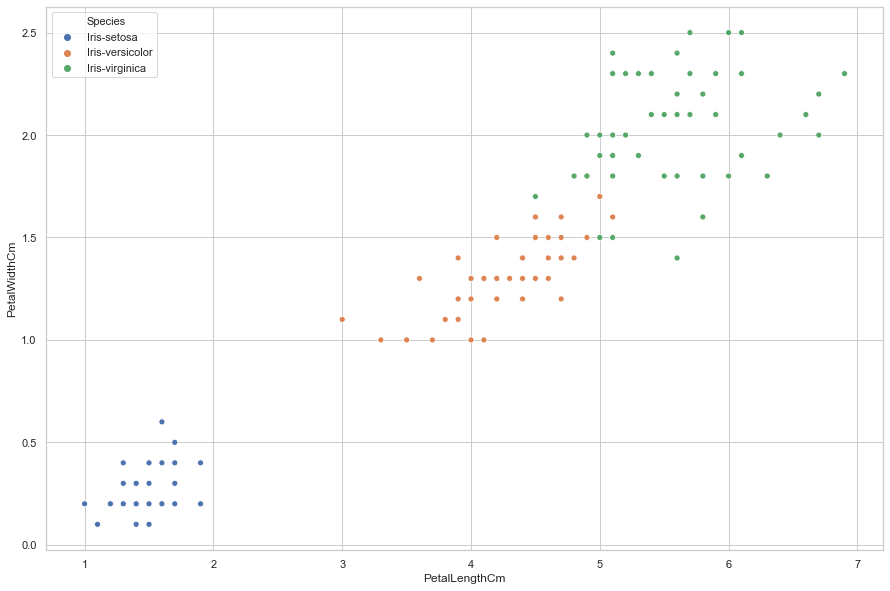

In [180]:
sns.scatterplot(df.PetalLengthCm,df.PetalWidthCm,hue=df.Species)
plt.show()

* Iris Sentosa has smaller petal length and petal width.
* Iris Virginia has large petal length and petal width.
* Iris Versicolor has moderate petal length and petal width.

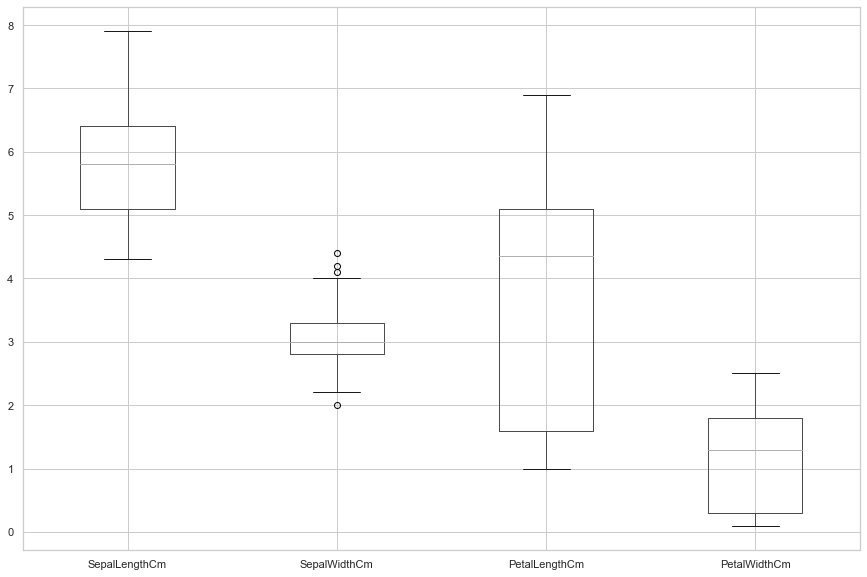

In [181]:
df.boxplot()
plt.show()

* The SepalWidth has few outliers while do not have any.

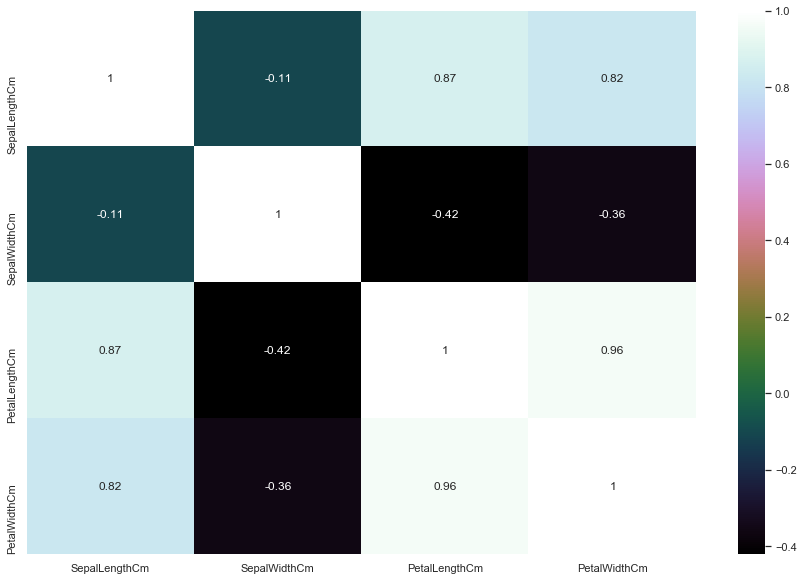

In [208]:
sns.heatmap(df.corr(),annot=True,cmap='cubehelix')
plt.show()

* For Sepal and Petal length and width are highly correlated.

## Train Test Split

In [182]:
x = df.drop('Species',axis=1)
y = df.Species
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=12)

## Base Decision Tree Model

In [183]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

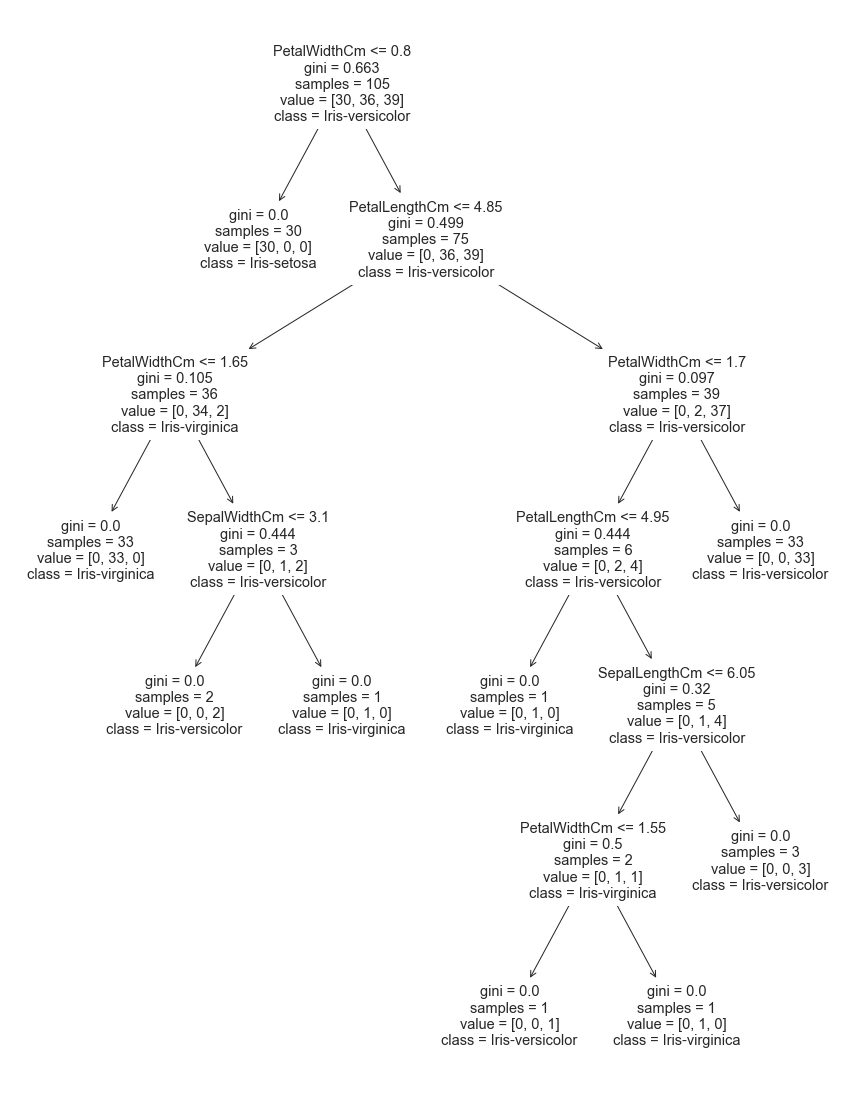

In [215]:
plot_tree(dt,feature_names=xtrain.columns,class_names=ytrain.unique())
plt.show()

In [185]:
base_pred = dt.predict(xtest)

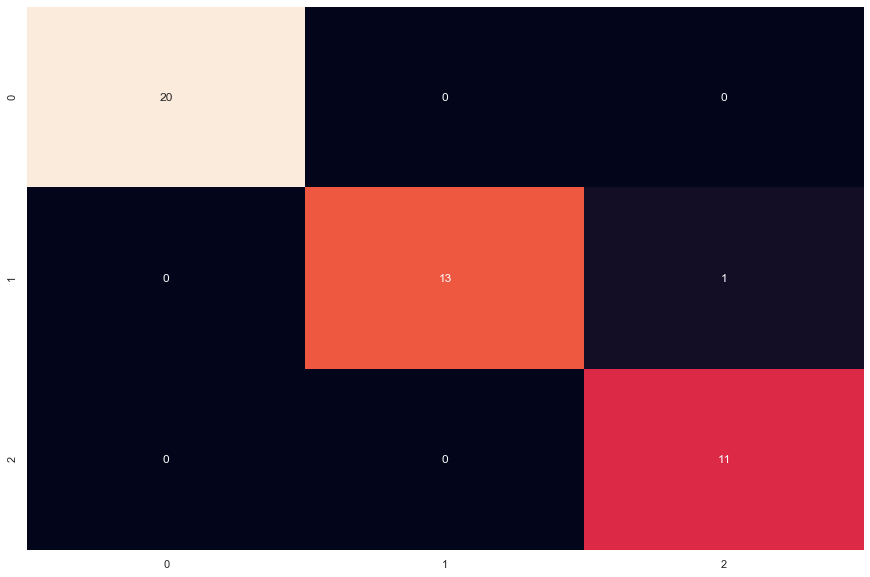

In [186]:
sns.heatmap(confusion_matrix(ytest,base_pred),cbar = False, fmt='d',annot=True)
plt.show()

In [187]:
print(classification_report(ytest,base_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [203]:
print('Cohen Kappa Scoe of Base Model:',round(cohen_kappa_score(ytest,base_pred),3))

Cohen Kappa Scoe of Base Model: 0.966


## Hyper Parameter Tuning

In [189]:
params = {'criterion':['gini','entropy'],
    'max_depth':np.arange(1,6),
    'min_samples_split': np.arange(1,6),
    #'min_samples_leaf':np.arange(1,6),
    'max_leaf_nodes':np.arange(0,6)}
   # 'ccp_alpha':np.arange(0,6)}
dt_grid = GridSearchCV(estimator = dt, param_grid = params , cv= 5, n_jobs =-1).fit(xtrain,ytrain)

In [190]:
dt_grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 4,
 'min_samples_split': 2}

In [191]:
dt_tuned = DecisionTreeClassifier(criterion= 'gini', max_depth = 3,min_samples_split=2 ,max_leaf_nodes=4).fit(xtrain,ytrain)

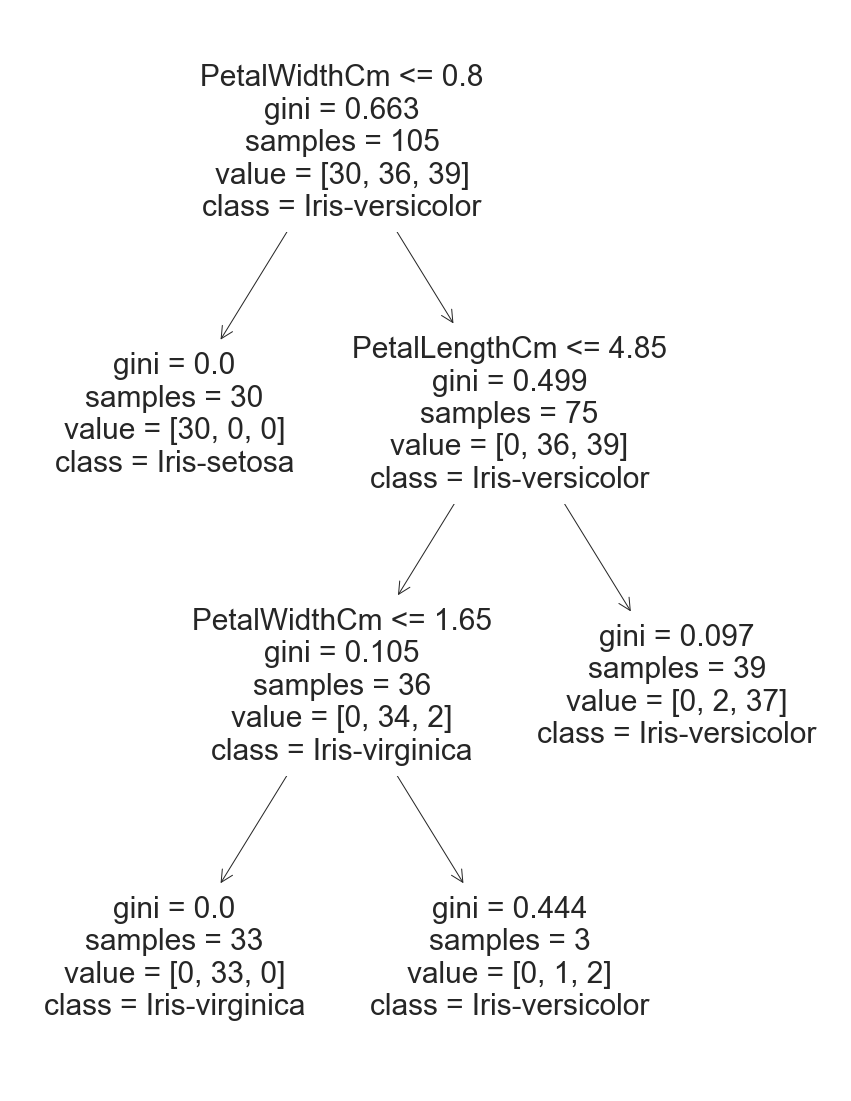

In [216]:
plot_tree(dt_tuned,feature_names=xtrain.columns,class_names=ytrain.unique())
plt.show()

In [193]:
dt_tuned_pred = dt_tuned.predict(xtest)

In [194]:
print(classification_report(ytest,dt_tuned_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.86      0.92        14
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [202]:
print('Cohen Kappa Scoe of Tuned Model:',round(cohen_kappa_score(ytest,dt_tuned_pred),3))

Cohen Kappa Scoe of Tuned Model: 0.932


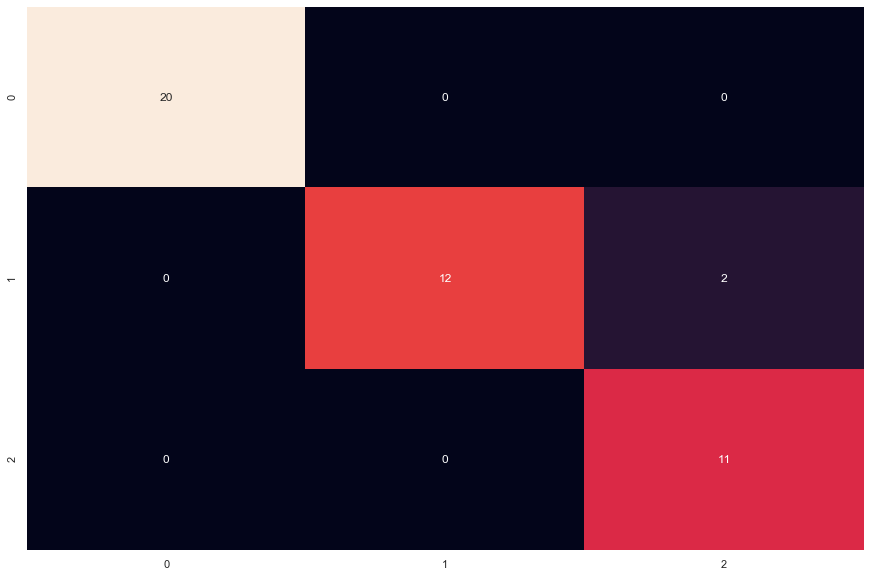

In [196]:
sns.heatmap(confusion_matrix(ytest,dt_tuned_pred),cbar = False, fmt='d',annot=True)
plt.show()

## Conclusion

* Our base model has good result than tuned model.
* Tuned model has less complexity than of Base Model.